# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Craig Wilcox

### Repo Link: https://github.com/s256657/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Pre-work requirement

In [18]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                 Version
----------------------- -----------
annotated-types         0.7.0
appnope                 0.1.4
asttokens               3.0.0
beautifulsoup4          4.13.4
blis                    1.3.0
catalogue               2.0.10
certifi                 2025.7.14
charset-normalizer      3.4.2
click                   8.2.1
cloudpathlib            0.21.1
comm                    0.2.3
confection              0.1.5
contourpy               1.3.3
cycler                  0.12.1
cymem                   2.0.11
debugpy                 1.8.15
decorator               5.2.1
en_core_web_sm          3.8.0
executing               2.2.0
fonttools               4.59.0
html5lib                1.1
idna                    3.10
ipykernel               6.30.0
ipython                 9.4.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
Jinja2                  3.1.6
joblib                  1.5.1
jupyter_client          8.6.3
jupyter_core            5.8.1
kiwisolver            

#### 1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [19]:
ARCHIVE_URL = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

def fetch_html(url):
    response = requests.get(url)
    response.raise_for_status()
    return response.text

def save_as_pickle(obj, filename):
    with open(filename, "wb") as f:
        pickle.dump(obj, f)

def main():
    html = fetch_html(ARCHIVE_URL)
    soup = BeautifulSoup(html, "html.parser")
    article = soup.find("article")
    if article:
        article_html = str(article)
    else:
        print("⚠️ Warning: <article> tag not found, saving full HTML instead.")
        article_html = html

    save_as_pickle(article_html, "laser_headlights_article.pkl")
    print("Saved article HTML to 'laser_headlights_article.pkl' successfully.")

if __name__ == "__main__":
    main()

Saved article HTML to 'laser_headlights_article.pkl' successfully.


#### 2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [20]:
def load_pickle(filename):
    with open(filename, "rb") as f:
        return pickle.load(f)

def extract_text_from_html(html):
    soup = BeautifulSoup(html, "html.parser")
    return soup.get_text()

def main():
    html = load_pickle("laser_headlights_article.pkl")
    text = extract_text_from_html(html)
    print(text)

if __name__ == "__main__":
    main()



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

#### 3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [21]:
def load_pickle(filename):
    with open(filename, "rb") as f:
        return pickle.load(f)

def extract_text_from_html(html):
    soup = BeautifulSoup(html, "html.parser")
    return soup.get_text()

def main():
    # Load and parse HTML text
    html = load_pickle("laser_headlights_article.pkl")
    text = extract_text_from_html(html)

    # Load spaCy English model
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)

    # Filter tokens: exclude stopwords, punctuation, and whitespace
    tokens = [
        token.text.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]

    # Count frequencies
    token_freq = Counter(tokens)
    most_common = token_freq.most_common(5)

    # Print results
    print("Top 5 Most Common Tokens:\n")
    for i, (token, freq) in enumerate(most_common, start=1):
        print(f"{i}. Token: '{token}' — Frequency: {freq}")

if __name__ == "__main__":
    main()

Top 5 Most Common Tokens:

1. Token: 'laser' — Frequency: 35
2. Token: 'headlights' — Frequency: 19
3. Token: 'headlight' — Frequency: 11
4. Token: 'technology' — Frequency: 10
5. Token: 'led' — Frequency: 10


#### 4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [22]:
def load_pickle(filename):
    with open(filename, "rb") as f:
        return pickle.load(f)

def extract_text_from_html(html):
    soup = BeautifulSoup(html, "html.parser")
    return soup.get_text()

def main():
    # Load and parse HTML text
    html = load_pickle("laser_headlights_article.pkl")
    text = extract_text_from_html(html)

    # Load spaCy model
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)

    # Extract lemmas, filter out stopwords, punctuation, whitespace
    lemmas = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]

    # Count frequencies
    lemma_freq = Counter(lemmas)
    most_common = lemma_freq.most_common(5)

    # Print results
    print("Top 5 Most Common Lemmas:\n")
    for i, (lemma, freq) in enumerate(most_common, start=1):
        print(f"{i}. Lemma: '{lemma}' — Frequency: {freq}")

if __name__ == "__main__":
    main()

Top 5 Most Common Lemmas:

1. Lemma: 'laser' — Frequency: 40
2. Lemma: 'headlight' — Frequency: 28
3. Lemma: 'beam' — Frequency: 12
4. Lemma: 'technology' — Frequency: 10
5. Lemma: 'led' — Frequency: 10


#### 5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [23]:
# Load the spaCy model once
nlp = spacy.load("en_core_web_sm")

def score_sentence_by_token(sentence, interesting_tokens):
    """
    Returns the ratio of interesting tokens in the sentence.
    All tokens are compared in lowercase.
    """
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_space]
    if not tokens:
        return 0
    count = sum(1 for token in tokens if token in interesting_tokens)
    return count / len(tokens)

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Returns the ratio of interesting lemmas in the sentence.
    All lemmas are compared in lowercase.
    """
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_space]
    if not lemmas:
        return 0
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas)

# === Test Inputs ===

sentence = "When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind."

interesting_tokens = ['laser', 'headlights', 'headlight', 'technology', 'led']
interesting_lemmas = ['laser', 'headlight', 'beam', 'technology', 'led']

# === Run scoring ===

token_score = score_sentence_by_token(sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(sentence, interesting_lemmas)

print("Testing on Sentence:")
print(sentence)
print("\nScoring Results:")
print(f"Token-based score: {token_score:.3f}")
print(f"Lemma-based score: {lemma_score:.3f}")

Testing on Sentence:
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.

Scoring Results:
Token-based score: 0.087
Lemma-based score: 0.087


#### 6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

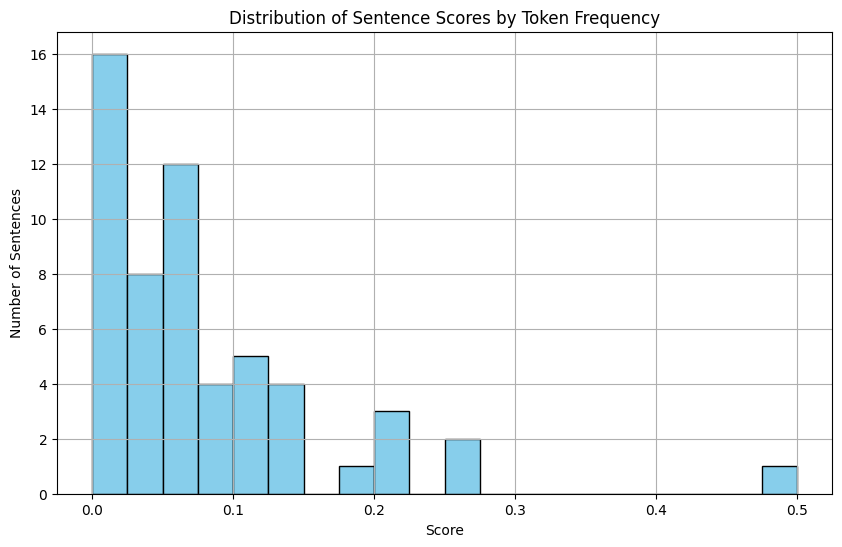

In [24]:
# === Load spaCy model ===
nlp = spacy.load("en_core_web_sm")

# === Load the article HTML from pickle ===
def load_pickle(filename):
    with open(filename, "rb") as f:
        return pickle.load(f)

# === Extract text from the article HTML ===
def extract_text_from_html(html):
    soup = BeautifulSoup(html, "html.parser")
    return soup.get_text()

# === Scoring function ===
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_space]
    if not tokens:
        return 0
    count = sum(1 for token in tokens if token in interesting_tokens)
    return count / len(tokens)

# === Main analysis ===
def main():
    # Load and extract text
    html = load_pickle("laser_headlights_article.pkl")
    text = extract_text_from_html(html)

    # Use spaCy to split into sentences
    doc = nlp(text)
    sentences = list(doc.sents)

    # Define your frequent tokens (from previous step)
    interesting_tokens = ['laser', 'headlights', 'headlight', 'technology', 'led']

    # Score each sentence
    scores = [score_sentence_by_token(sent.text, interesting_tokens) for sent in sentences]

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(scores, bins=20, color='skyblue', edgecolor='black')
    plt.title("Distribution of Sentence Scores by Token Frequency")
    plt.xlabel("Score")
    plt.ylabel("Number of Sentences")
    plt.grid(True)
    

    return scores  # in case you want to inspect them later

if __name__ == "__main__":
    scores = main()

    # Based on the distribution .02 is the most common score. The most common range is under .1

#### 7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

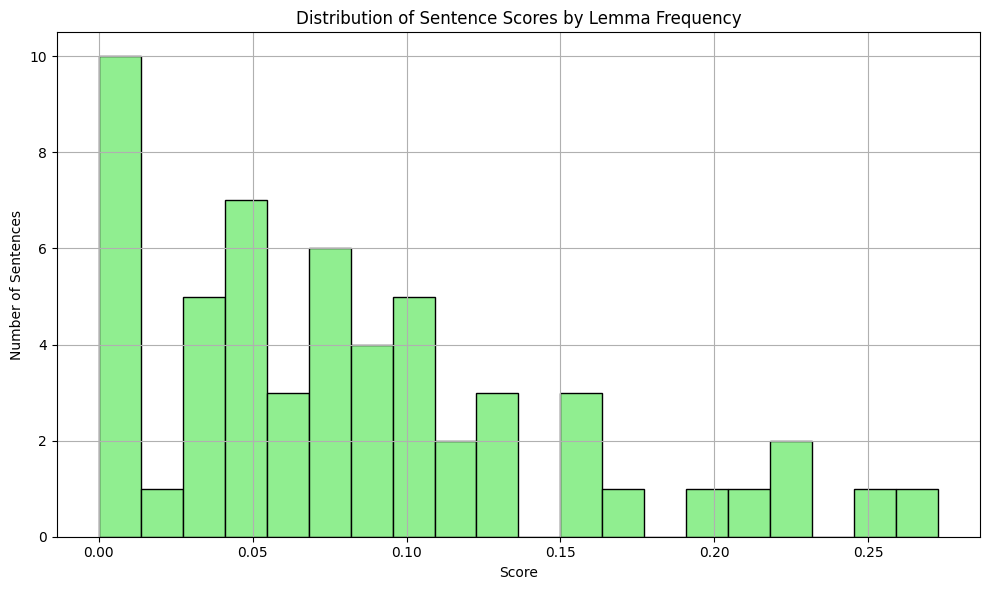

In [25]:

# === Load spaCy model ===
nlp = spacy.load("en_core_web_sm")

# === Load article from .pkl ===
def load_pickle(filename):
    with open(filename, "rb") as f:
        return pickle.load(f)

# === Extract just the article text ===
def extract_text_from_html(html):
    soup = BeautifulSoup(html, "html.parser")
    return soup.get_text()

# === Score sentence based on lemma frequency ===
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_space]
    if not lemmas:
        return 0
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas)

# === Main logic ===
def main():
    # Load and parse article
    html = load_pickle("laser_headlights_article.pkl")
    text = extract_text_from_html(html)

    # Break article into sentences
    doc = nlp(text)
    sentences = list(doc.sents)

    # Define interesting lemmas from Q3
    interesting_lemmas = ['laser', 'headlight', 'beam', 'technology', 'led']

    # Score each sentence
    scores = [score_sentence_by_lemma(sent.text, interesting_lemmas) for sent in sentences]

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(scores, bins=20, color='lightgreen', edgecolor='black')
    plt.title("Distribution of Sentence Scores by Lemma Frequency")
    plt.xlabel("Score")
    plt.ylabel("Number of Sentences")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return scores

if __name__ == "__main__":
    scores = main()

    # It appears the most common range of scores is between .05 and .1.

#### 8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

All of the tokens and lemma's that were found from the code are nouns. Below are changes that could be added to the code to only search for nouns.

tokens = [
    token.text.lower()
    for token in doc
    if not token.is_space and token.pos_ == "NOUN"
]

lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_space and token.pos_ == "NOUN"
]